In [45]:
import pandas as pd
import numpy as np

df_student = pd.read_csv("student.csv")
df_point = pd.read_csv("point.csv")

In [46]:
df_student.head()


,Unnamed: 0,student_id,student_name,house,year
0,0,101,리안,래번클로,6
1,1,102,엘라라,후플푸프,5
2,2,103,카이,그리핀도르,2
3,3,104,셀레네,래번클로,4
4,4,105,아리온,래번클로,6


In [47]:
df_point.head()

,Unnamed: 0,log_id,student_id,subject,points
0,0,1,110,마법의 역사,10
1,1,2,116,어둠의 마법 방어술,10
2,2,3,115,마법약,10
3,3,4,115,약초학,-10
4,4,5,119,약초학,5


In [48]:
df = df_student.merge(df_point, on='student_id')

In [49]:
df.groupby('house')['points'].sum().sort_values(ascending=False)

house
슬리데린     35
래번클로     30
그리핀도르    25
후플푸프     15
Name: points, dtype: int64

In [50]:
df_subject_score = pd.DataFrame(df.groupby(['house','subject'])['points'].sum())
df_subject_score

points
house subject           
그리핀도르 마법약             45
      마법의 역사          -5
      변신술            -15
      어둠의 마법 방어술      -5
      천문학              5
래번클로  마법약            -15
      마법의 역사          15
      변신술             35
      약초학             10
      어둠의 마법 방어술       5
      천문학            -20
슬리데린  마법의 역사          10
      변신술             15
      약초학             10
후플푸프  마법약             10
      마법의 역사          20
      변신술              5
      약초학             -5
      어둠의 마법 방어술     -15

In [51]:
# 각 기숙사별로 강한 과목이 있을까요? 피벗 테이블을 사용해서 각 기숙사가 어떤 과목에 강하고 약한지 파악해봅시다.
df_pivot = pd.pivot_table(df, index = 'house', columns = 'subject', values = 'points', aggfunc= 'mean')
df_pivot

subject,마법약,마법의 역사,변신술,약초학,어둠의 마법 방어술,천문학
house,,,,,,
그리핀도르,9.000000,-5.00,-5.000000,NaN,-2.5,5.000000
래번클로,-5.000000,3.75,11.666667,2.5,5.0,-6.666667
슬리데린,NaN,10.00,15.000000,10.0,NaN,NaN
후플푸프,1.666667,10.00,1.250000,-2.5,-5.0,NaN


In [52]:
import pandas as pd

# 데이터 준비하기
data = {
    'Country': ['USA', 'Canada', 'Germany', 'USA', 'Germany', 'Canada', 'USA', 'Germany', 'Canada', 'USA'],
    'Purchased': ['Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No'],
    'Age': [22, 25, 30, 28, 35, 40, 45, 28, 25, 38]
}
df = pd.DataFrame(data)

# LabelEncoder 준비하기
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# LabelEncoder로 Label encoding 하기
label_encoded = label_encoder.fit_transform(df['Country'])
label_encoded = pd.DataFrame(label_encoded, columns=['Country_labelEncoded'])


# pd.get_dummies로 One hot Encoding 하기
onehot_encoded = pd.get_dummies(df['Country'], dtype=int)

df = pd.concat([df, label_encoded, onehot_encoded], axis=1)
df

,Country,Purchased,Age,Country_labelEncoded,Canada,Germany,USA
0,USA,Yes,22,2,0,0,1
1,Canada,No,25,0,1,0,0
2,Germany,No,30,1,0,1,0
3,USA,Yes,28,2,0,0,1
4,Germany,Yes,35,1,0,1,0
5,Canada,No,40,0,1,0,0
6,USA,No,45,2,0,0,1
7,Germany,Yes,28,1,0,1,0
8,Canada,Yes,25,0,1,0,0
9,USA,No,38,2,0,0,1


In [53]:
import pandas as pd

# 예제 데이터셋 생성
data = {
    'Feature1': [100, 200, 300, 400, 500],
    'Feature2': [1, 2, 3, 4, 5],
    'Feature3': [10, 1000, 10000, 100000, 1000000]
}

df = pd.DataFrame(data)

print("Original Data:")
print(df)

Original Data:
   Feature1  Feature2  Feature3
0       100         1        10
1       200         2      1000
2       300         3     10000
3       400         4    100000
4       500         5   1000000


In [54]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

ss = StandardScaler()
rs = RobustScaler()
mm = MinMaxScaler()

ss.fit(df)
rs.fit(df)
mm.fit(df)

ss_df = pd.DataFrame(ss.transform(df), columns = df.columns)
rs_df = pd.DataFrame(rs.transform(df), columns = df.columns)
mm_df = pd.DataFrame(mm.transform(df), columns = df.columns)

In [55]:
ss_df.describe()

,Feature1,Feature2,Feature3
count,5.000000,5.000000,5.000000
mean,0.000000,0.000000,0.000000
std,1.118034,1.118034,1.118034
min,-1.414214,-1.414214,-0.568702
25%,-0.707107,-0.707107,-0.566168
50%,0.000000,0.000000,-0.543133
75%,0.707107,0.707107,-0.312777
max,1.414214,1.414214,1.990781


In [58]:
rs_df.describe()

,Feature1,Feature2,Feature3
count,5.000000,5.000000,5.000000
mean,0.000000,0.000000,2.143455
std,0.790569,0.790569,4.412281
min,-1.000000,-1.000000,-0.100909
25%,-0.500000,-0.500000,-0.090909
50%,0.000000,0.000000,0.000000
75%,0.500000,0.500000,0.909091
max,1.000000,1.000000,10.000000


In [59]:
mm_df.describe()

,Feature1,Feature2,Feature3
count,5.000000,5.000000,5.000000
mean,0.500000,0.500000,0.222194
std,0.395285,0.395285,0.436820
min,0.000000,0.000000,0.000000
25%,0.250000,0.250000,0.000990
50%,0.500000,0.500000,0.009990
75%,0.750000,0.750000,0.099991
max,1.000000,1.000000,1.000000


In [60]:
import seaborn as sns

df = sns.load_dataset("taxis")
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [68]:
df['color'].value_counts()

color
yellow    5451
green      982
Name: count, dtype: int64

In [67]:
df['payment'].value_counts()

payment
credit card    4577
cash           1812
Name: count, dtype: int64

In [69]:
df['pickup_borough'].value_counts()

pickup_borough
Manhattan    5268
Queens        657
Brooklyn      383
Bronx          99
Name: count, dtype: int64

In [79]:
df['dropoff_borough'].value_counts()

dropoff_borough
Manhattan        5206
Queens            542
Brooklyn          501
Bronx             137
Staten Island       2
Name: count, dtype: int64

전체 주성분 개수: 15
90% 이상의 분산을 설명하기 위해 필요한 주성분 개수: 5

설명된 분산 비율(상위 5개):
[0.55602954 0.14524253 0.11199223 0.07127516 0.04470516]


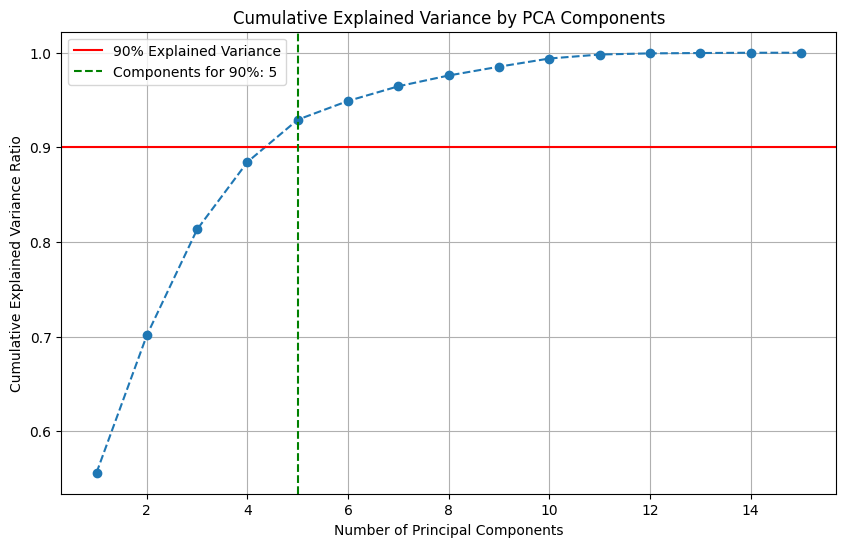

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. 데이터 로드 및 전처리 (결측치 제거)
df = sns.load_dataset('taxis')
df.dropna(inplace=True)

# 분석에 사용할 컬럼 분류
cat_cols = ['color', 'payment', 'pickup_borough', 'dropoff_borough']

# 수치형 변수 (날짜 컬럼 제외)
num_cols = ['passengers', 'distance', 'fare', 'tip', 'tolls', 'total']

# 2. 원-핫 인코딩 (One-Hot Encoding)
# drop_first=True로 다중공선성 방지
df_encoded = pd.get_dummies(df[cat_cols], drop_first=True)

# 3. 스케일링 (Standard Scaling)
scaler = StandardScaler()
df_scaled_num = pd.DataFrame(scaler.fit_transform(df[num_cols]), columns=num_cols, index=df.index)

# 4. 데이터 병합 (스케일링된 수치형 + 원핫인코딩된 범주형)
X = pd.concat([df_scaled_num, df_encoded], axis=1)

# 5. PCA 적용
pca = PCA()
pca.fit(X)

# 6. 설명된 분산 비율 및 누적합 계산
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# 적절한 주성분 개수 찾기 (예: 분산의 90% 이상을 설명하는 지점)
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1

# 7. 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.9, color='r', linestyle='-', label='90% Explained Variance')
plt.axvline(x=n_components_90, color='g', linestyle='--', label=f'Components for 90%: {n_components_90}')

plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.legend()
plt.savefig('pca_variance_plot.png')

print(f"전체 주성분 개수: {len(cumulative_variance)}")
print(f"90% 이상의 분산을 설명하기 위해 필요한 주성분 개수: {n_components_90}")
print("\n설명된 분산 비율(상위 5개):")
print(explained_variance_ratio[:5])